In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cost = pd.read_csv('COST.csv', parse_dates = [0], index_col = 'Date')['Adj Close']

In [3]:
wmt = pd.read_csv('WMT.csv', parse_dates = [0], index_col = 'Date')['Adj Close']

In [4]:
tgt = pd.read_csv('TGT.csv', parse_dates = [0], index_col = 'Date')['Adj Close']

In [5]:
dg = pd.read_csv('DG.csv', parse_dates = [0], index_col = 'Date')['Adj Close']

In [6]:
total = pd.concat([cost,wmt,tgt,dg], axis = 1)

In [7]:
total.columns = ['COSTCO','WALMART','TARGET','DG']

In [8]:
total

,COSTCO,WALMART,TARGET,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [9]:
total_returns = total.pct_change(1).dropna()

In [10]:
total_returns

,COSTCO,WALMART,TARGET,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


In [18]:
cumul_return = (1+total_returns['COSTCO']).cumprod()-1
cumul_return

Date
2016-09-07   -0.015311
2016-09-08   -0.029040
2016-09-09   -0.046565
2016-09-12   -0.040301
2016-09-13   -0.046311
                ...   
2021-08-27    2.196244
2021-08-30    2.235919
2021-08-31    2.232796
2021-09-01    2.240106
2021-09-02    2.271690
Name: COSTCO, Length: 1257, dtype: float64

<Axes: xlabel='Date'>

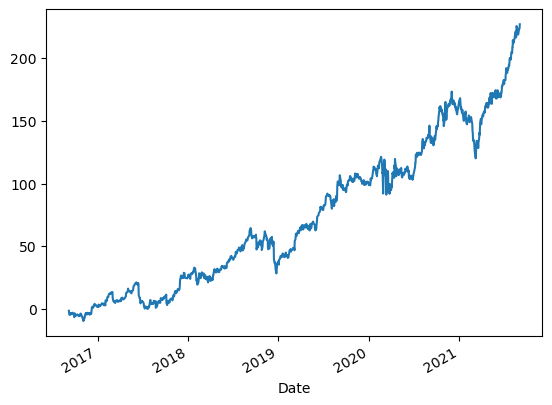

In [12]:
cumul_return_perc = cumul_return * 100
cumul_return_perc.plot()

In [13]:
total_returns

,COSTCO,WALMART,TARGET,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


In [14]:
np.dot([0.5,0,0.25,0.25], total_returns.transpose())

array([-0.00781003, -0.01372145, -0.01099856, ..., -0.00558652,
        0.00026645,  0.00685398])

In [15]:
n = len(total_returns.columns)
n

4

In [16]:
equal_weights = n*[1/n]
equal_return = np.dot(equal_weights, total_returns.transpose())
equal_return

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [20]:
cumul_return_equal_weight = (1+equal_return).cumprod()-1

In [32]:
final_result = cumul_return_equal_weight*100

In [34]:
type(final_result)

numpy.ndarray

In [40]:
cewrp = pd.Series(final_result, index = total_returns.index)
type(cewrp)

pandas.core.series.Series

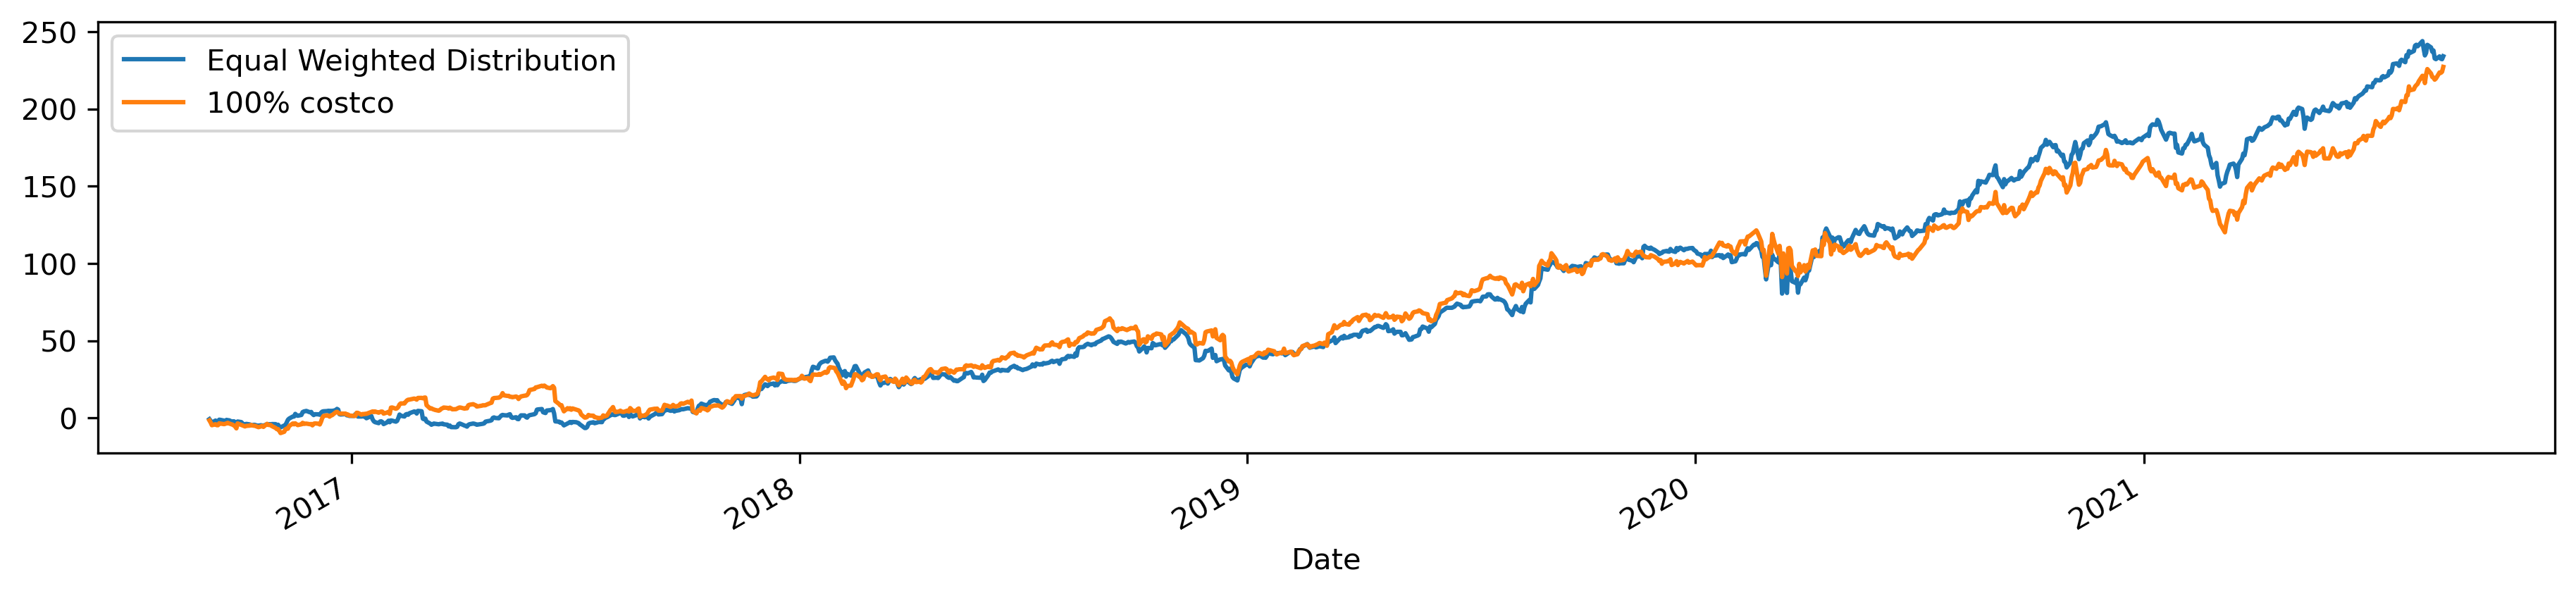

In [48]:
plt.figure(dpi = 300, figsize = (15,3))
cewrp.plot(label = 'Equal Weighted Distribution')
cumul_return_perc.plot(label ='100% costco')
plt.legend()

In [52]:
total/total.shift(1)

,COSTCO,WALMART,TARGET,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,0.984689,0.987123,1.002853,0.996528
2016-09-08,0.986058,0.996809,0.988051,0.984948
2016-09-09,0.981951,0.978700,0.993378,0.998726
2016-09-12,1.006569,1.023328,1.004347,1.020475
...,...,...,...,...
2021-08-27,1.002292,0.994367,1.000884,0.997123
2021-08-30,1.012413,1.008053,1.000722,1.000488
2021-08-31,0.999035,1.002708,0.990456,0.989129


In [56]:
log_rets = np.log(total/total.shift(1))
log_rets

,COSTCO,WALMART,TARGET,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [58]:
total_returns

,COSTCO,WALMART,TARGET,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


In [62]:
n = len(total.columns)
n

4

In [68]:
weights = np.random.random(n)

In [70]:
np.sum(weights)

1.2871298992533728

In [76]:
weights/np.sum(weights)

array([0.24792197, 0.70787049, 0.02677818, 0.01742936])

In [81]:
def gen_random_holding(n):
    weights = np.random.random(n)
    return weights/np.sum(weights)

array([0.41559683, 0.43258405, 0.0033244 , 0.14849473])

In [83]:
gen_random_holding(4)

array([0.79303176, 0.00895668, 0.11652038, 0.08149118])

In [116]:
def calculate_return(weights,log_rets):
    return np.sum(log_rets.mean()*weights)*252

In [118]:
log_rets_cov = log_rets.cov()

In [120]:
def calculate_vol(weights, log_rets_cov):
    annualised_cov = np.dot(log_rets_cov*252, weights)
    vol = np.dot(weights.transpose(),annualised_cov)
    return np.sqrt(vol)

In [122]:
weights.transpose()

array([0.21206127, 0.33531249, 0.32673575, 0.1258905 ])

In [124]:
calculate_vol(weights,log_rets_cov )

0.20046788768865687

In [147]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(6000):
    weights = gen_random_holding(n=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_return(weights,log_rets))
    mc_portfolio_vol.append(calculate_vol(weights, log_rets_cov))

In [149]:
mc_sharpe_ratio = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

Text(0, 0.5, 'Returns')

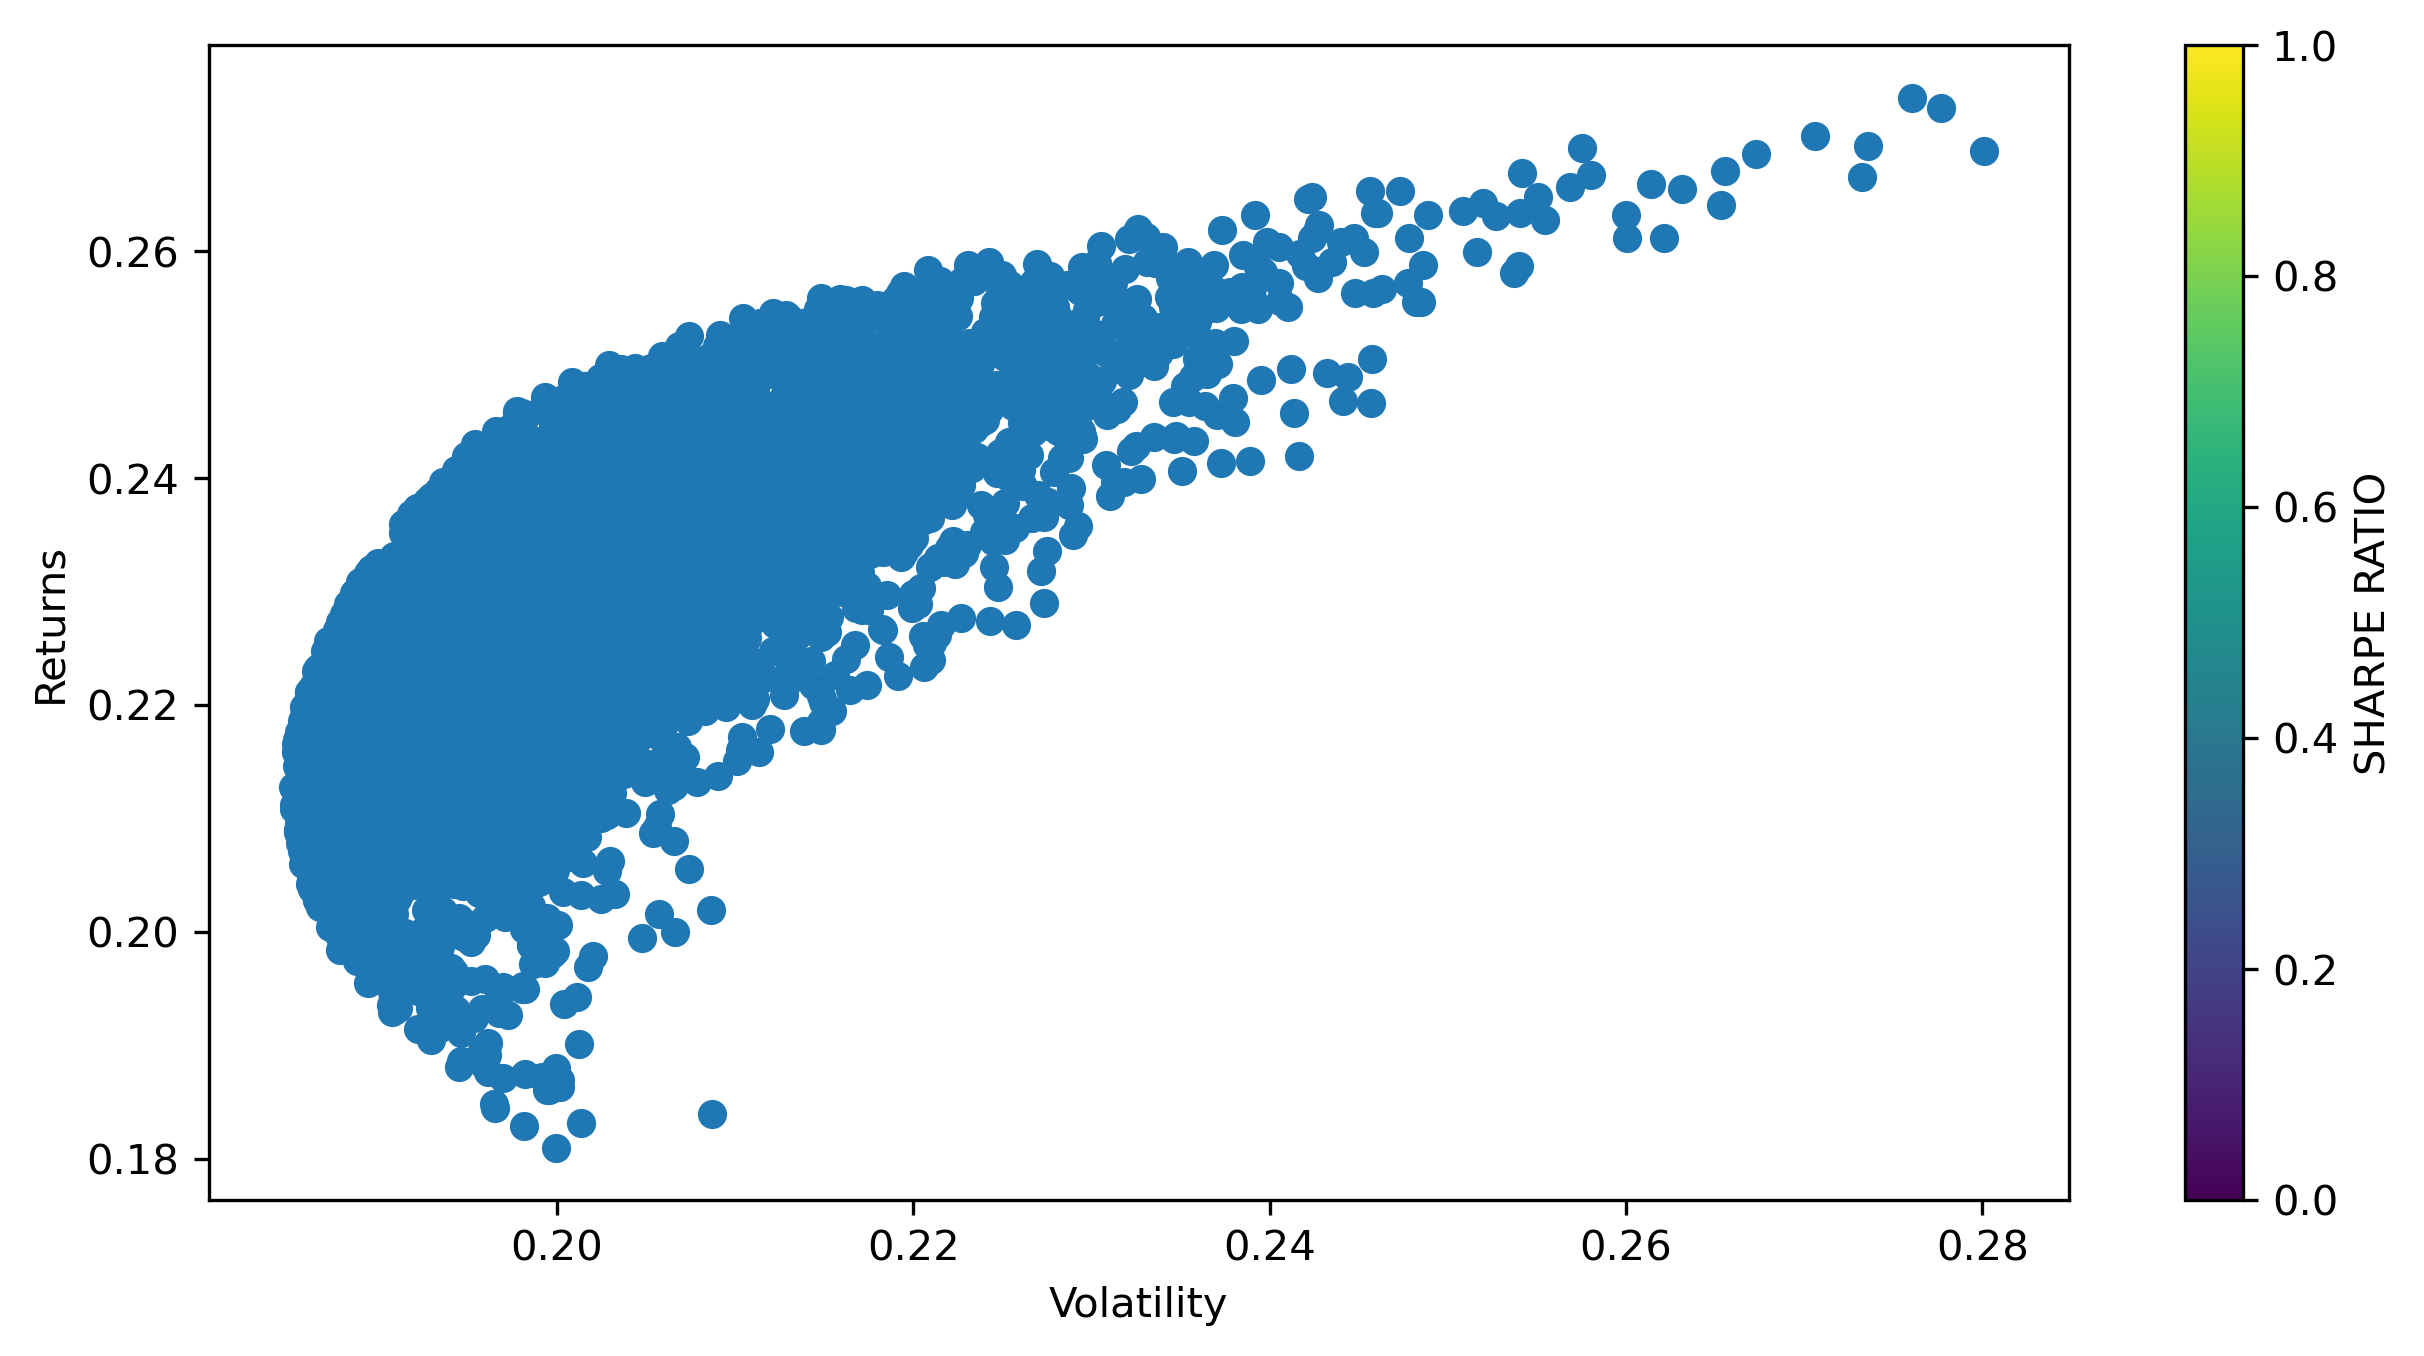

In [151]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(mc_portfolio_vol,mc_portfolio_returns);
plt.colorbar(label = 'SHARPE RATIO')
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [153]:
np.argmax(mc_sharpe_ratio)

3285

In [157]:
mc_weights[3285]

array([0.5568601 , 0.01020961, 0.20444915, 0.22848115])

In [184]:
from scipy.optimize import minimize 

In [186]:
def optimise(weights):
    return -1 * (calculate_return(weights,log_rets))/(calculate_vol(weights, log_rets_cov))

In [188]:
bounds = tuple((0,1) for n in range(n))

In [190]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [192]:
constraint = ({'type':'eq', 'fun':lambda weights: np.sum(weights)-1})

In [194]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [208]:
minimize(fun=optimise, x0 = equal_weights, bounds = bounds,constraints=constraint )

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2451267776086845
       x: [ 5.846e-01  0.000e+00  1.768e-01  2.386e-01]
     nit: 4
     jac: [-3.517e-04  5.834e-02  1.120e-03  3.204e-05]
    nfev: 20
    njev: 4

In [216]:
expected_returns_range = np.linspace(0.18,0.28,100)

In [220]:
cons = ({'type':'eq', 'fun':lambda weights: np.sum(weights)-1},
       {'type':'eq', 'fun': lambda weights:calculate_return(weights,log_rets) - possible_return})

In [222]:
def calculate_vol(weights):
    annualised_cov = np.dot(log_rets_cov*252, weights)
    vol = np.dot(weights.transpose(),annualised_cov)
    return np.sqrt(vol)

In [228]:
frontier_vol = []
portfolio_holding = []

for possible_return in expected_returns_range:
    result = minimize(calculate_vol, equal_weights, bounds = bounds, constraints = cons)
    frontier_vol.append(result['fun'])
    portfolio_holding.append(result['x'])

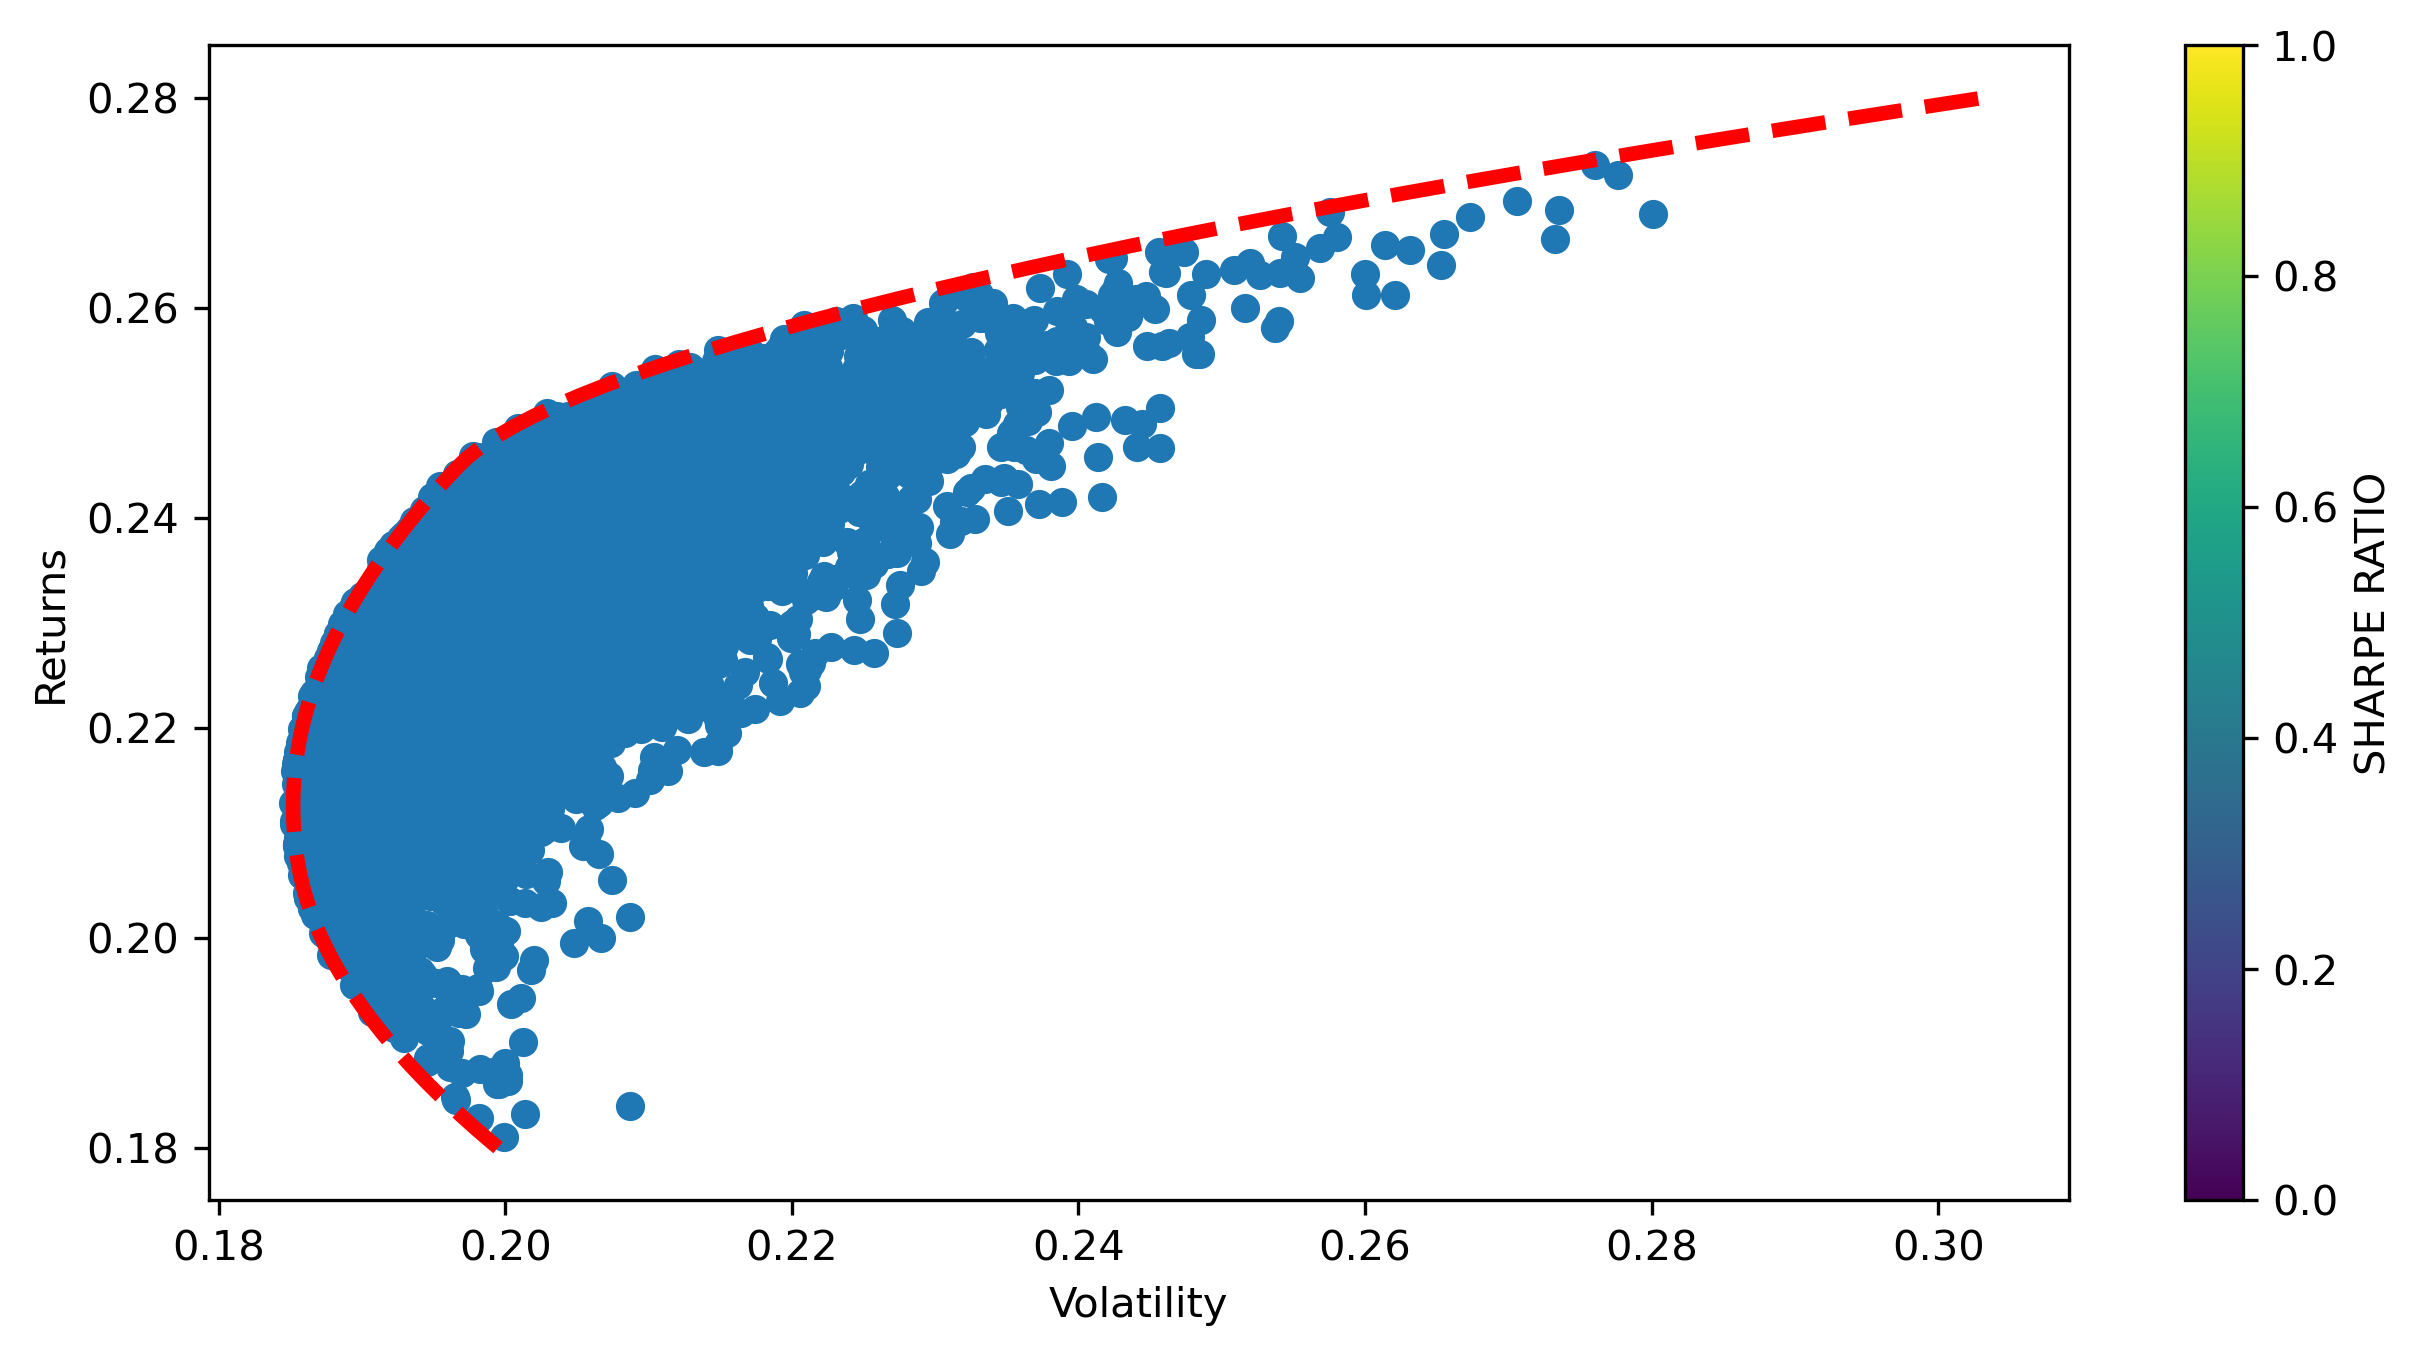

In [234]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(mc_portfolio_vol,mc_portfolio_returns);
plt.colorbar(label = 'SHARPE RATIO')
plt.xlabel('Volatility')
plt.ylabel('Returns')


plt.plot(frontier_vol, expected_returns_range, color = 'red', ls = '--', lw = 3.5)

In [238]:
frontier_vol = np.array(frontier_vol)

In [242]:
np.where(frontier_vol>0.24)

(array([84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [246]:
portfolio_holding[84]

array([3.64716769e-01, 6.93889390e-18, 6.35283231e-01, 0.00000000e+00])

In [248]:
frontier_vol[84]

0.24006958159899666

In [250]:
expected_returns_range[84]

0.2648484848484849